<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

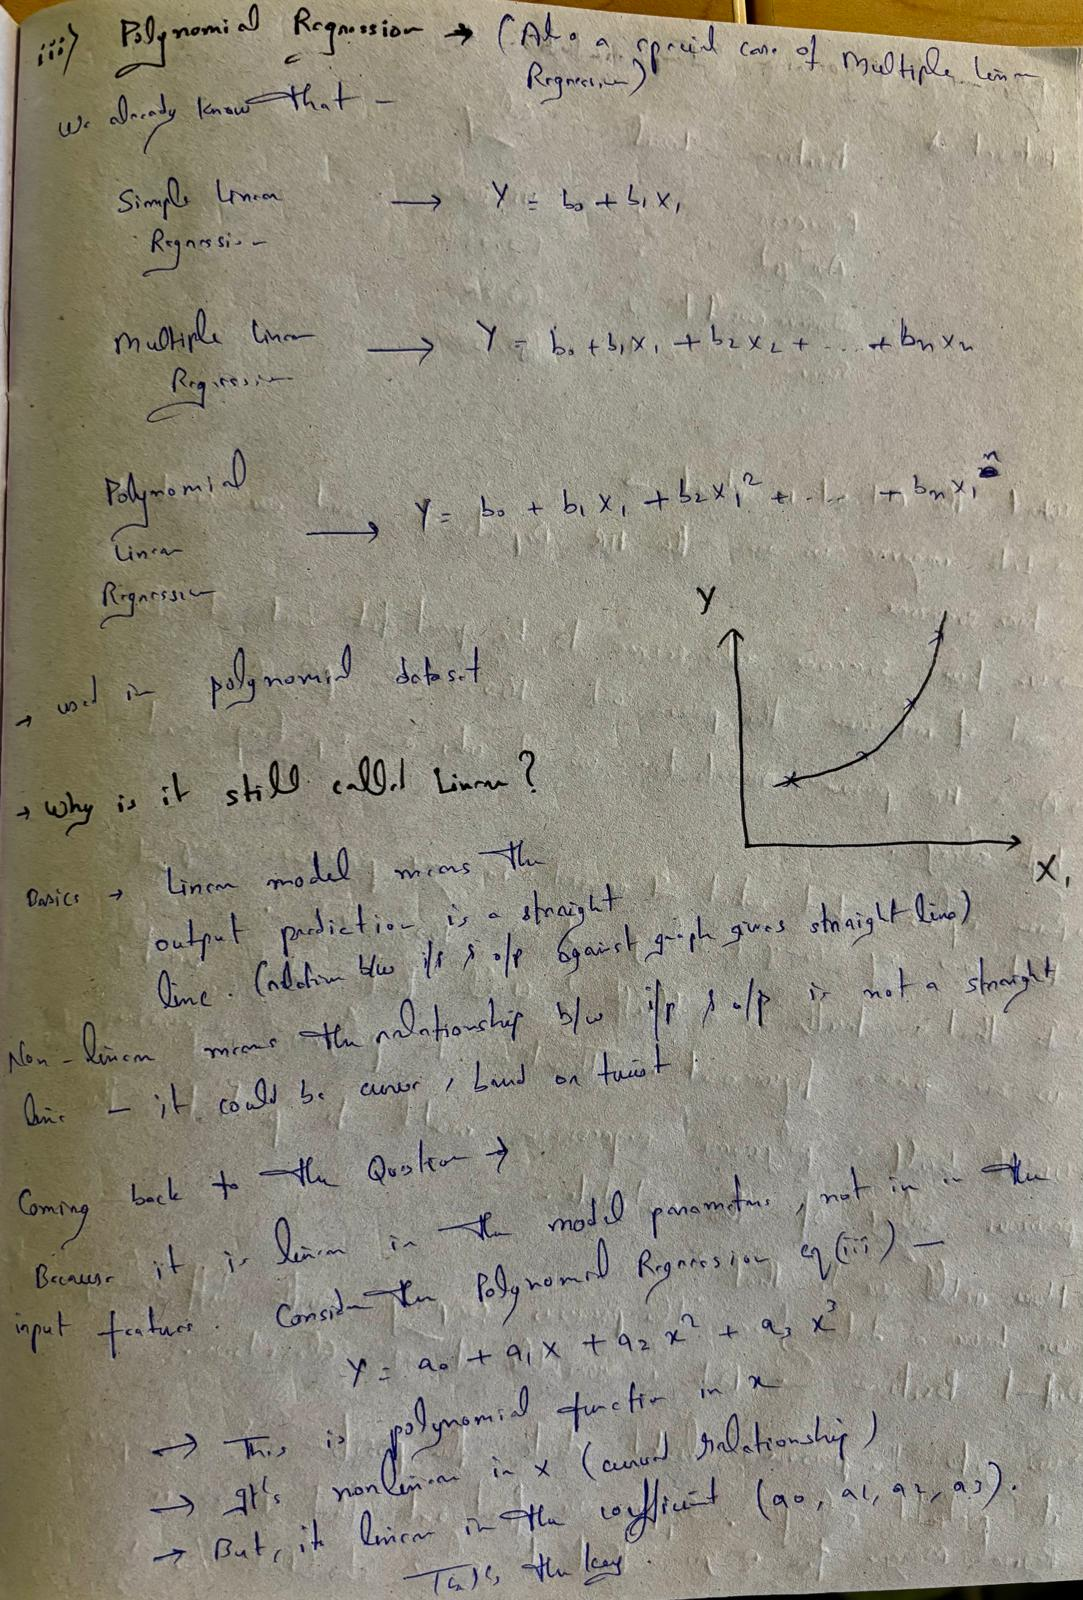

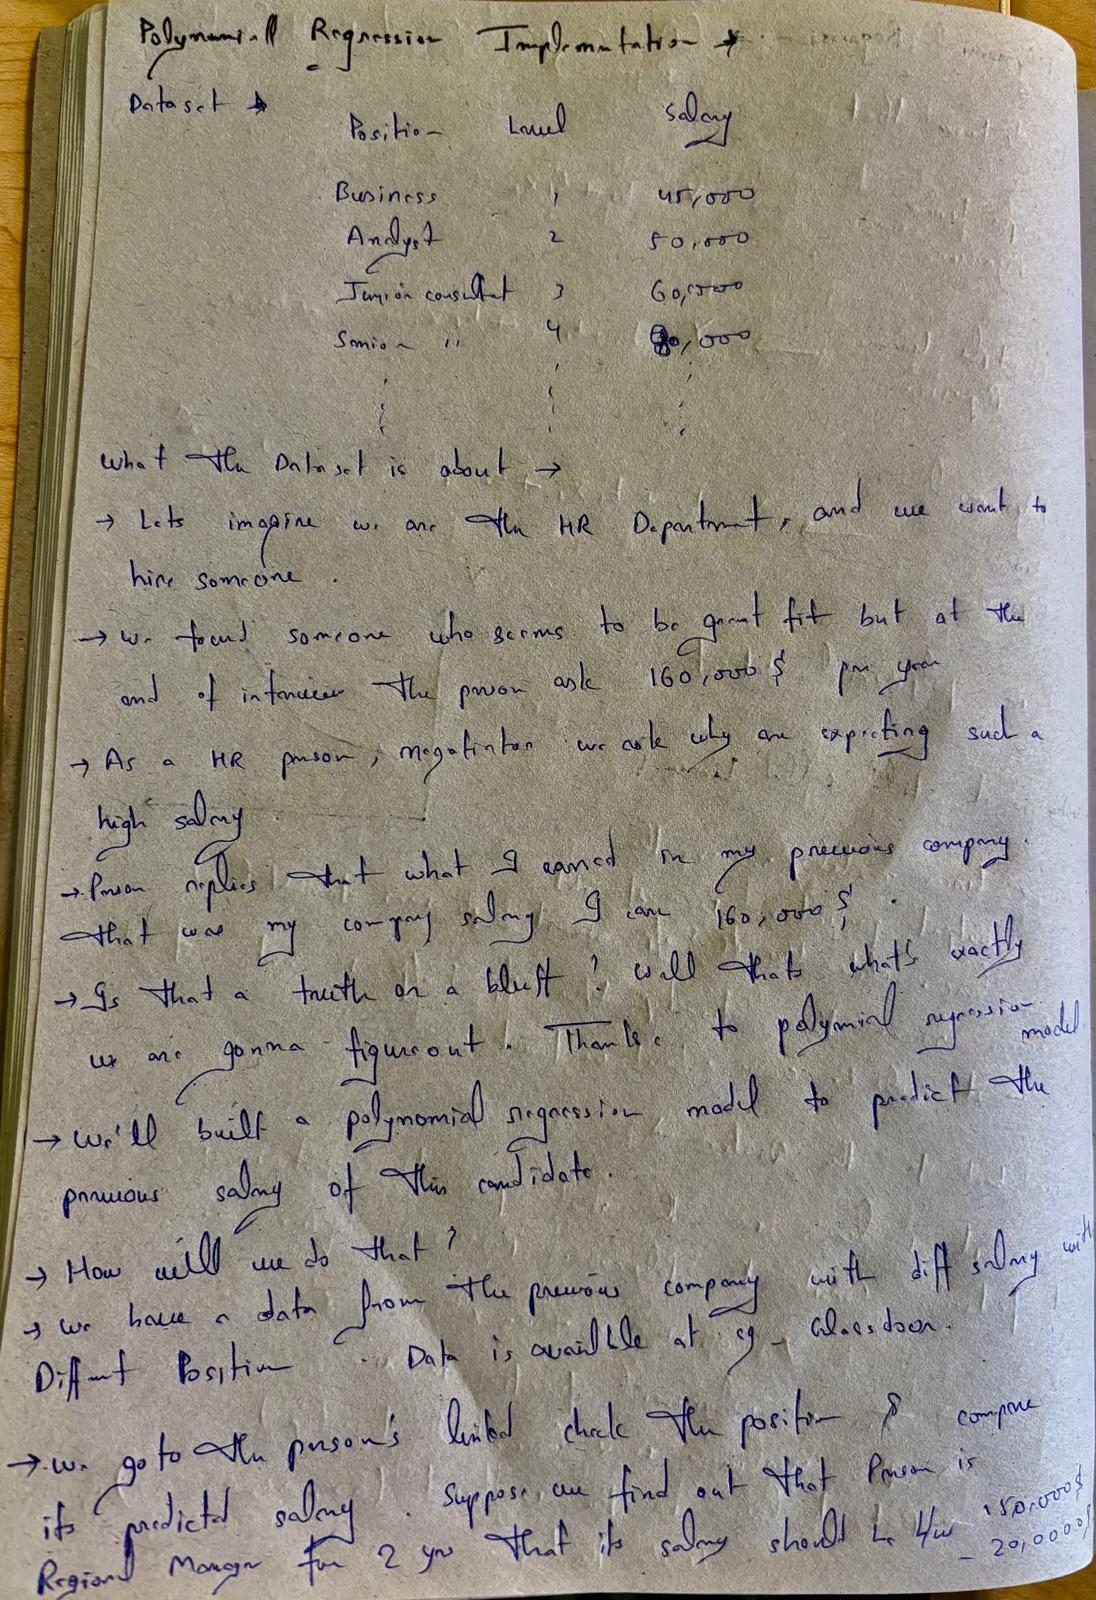

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Why we dont split the data into training and test set can u explain me in depth and in simple words

In polynomial regression, we often skip splitting data into training and test sets at first because the focus is on understanding the model and its curve-fitting abilities. Polynomial regression can be sensitive to overfitting, so we want to see how well it can fit the data before worrying about generalization. Once we understand the behavior of the polynomial model on the full dataset, we can later introduce a test set to evaluate its performance on unseen data.

## Training the Polynomial Regression model on the whole dataset

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

this episod requires lot more explanation
0 upvotes
Arash · Lecture 86 · 1 year ago
1. what is the matrix of features?

2. what happens when we have more than one feature and how the matrix of features looks like in that case?

3. how to define the degree level?

4. how and why polynomial regressor transformed into multi linear regression?

5. how can it be transferred into multi linear regressor when there are more than one feature?


1. Matrix of Features:

In Polynomial Regression, the matrix of features isn't just the original features. It's a transformed version containing additional features created by raising the original features to different powers (based on the chosen degree).

2. Multiple Features and Feature Matrix:

When you have more than one feature (x1, x2, etc.), the feature matrix expands. It includes the original features and their combinations up to the chosen degree.

Imagine features x1 and x2. The matrix would include:

x1 (original)

x2 (original)

x1^2 (squared term)

x2^2 (squared term)

x1*x2 (interaction term) - This is created by multiplying the original features.

3. Defining the Degree Level:

The degree level determines the complexity of the polynomial relationship you're trying to capture. A higher degree creates more terms (powers and interactions) in the feature matrix, allowing for more complex curves. But be cautious of overfitting with too high a degree.

4. Transformation to Multilinear Regression:

Polynomial Regression becomes a special case of Multilinear Regression after creating the feature matrix. The transformed features act as new independent variables, and the model essentially performs linear regression on these transformed features.

5. Transferring to Multilinear Regression (Multiple Features):

The transfer process remains the same even with multiple features. You create the expanded feature matrix with all original features, their powers, and interaction terms. Then, the model treats these transformed features as independent variables for linear regression.

In essence, Polynomial Regression leverages the power of Multilinear Regression by transforming the original features to capture non-linear relationships.

## Visualising the Linear Regression results

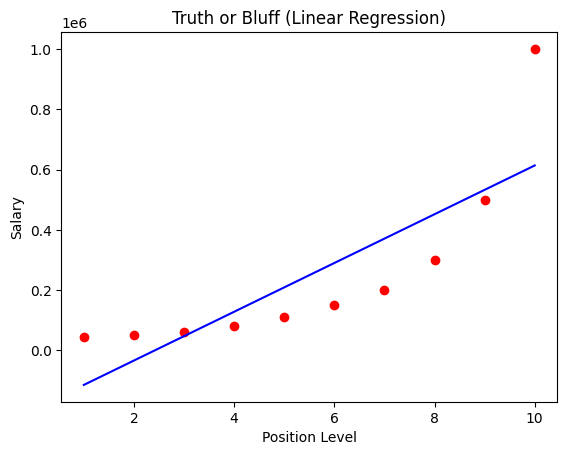

In [22]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

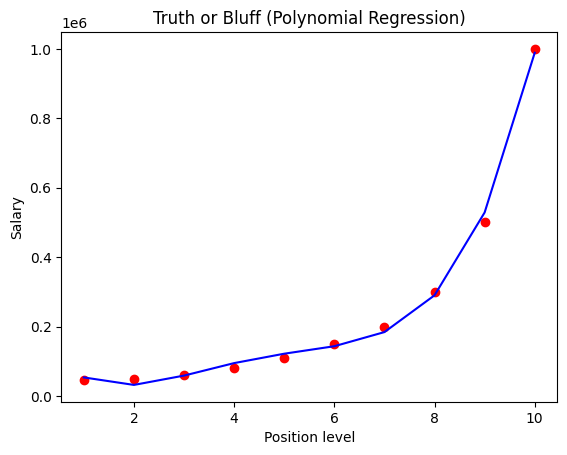

In [23]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

/tmp/ipython-input-24-3061864919.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


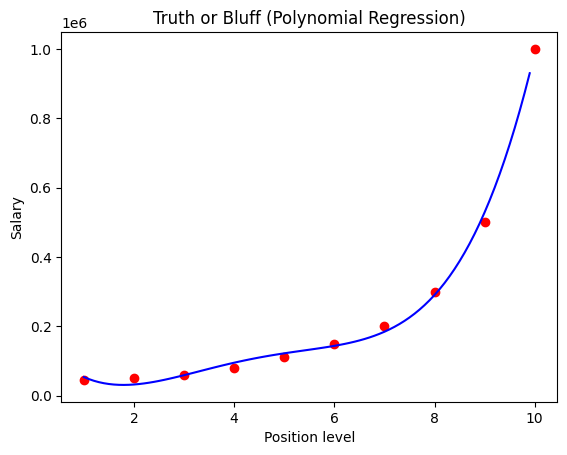

In [24]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [25]:
lin_reg.predict([[6.5]])

array([330378.78787879])

total wrong because the data is non linear so simple linear regression model doesnt work

## Predicting a new result with Polynomial Regression

In [26]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

polynomial works because the data was non- linear

 1. How would i know that the simple, multi, or polynomial regression will be use here? In simple terms means that what's the  concept of knowing which regression model will be used according to the data set.

2. Is polynomial regression is best from simple, and multi regression?

3. If I have the data to predict something (e.g: Salaries) can i use polynomial for all the data sets which are given to predict even prediction can be predict by simple linear regression model?

Choosing the Regression Model:

Simple Linear Regression: Use when you have one independent variable and a linear relationship.

Multiple Linear Regression: Use when you have multiple independent variables and a linear relationship.

Polynomial Regression: Use when the data shows a non-linear relationship. Polynomial regression can fit more complex curves.

Best Regression Model:

There's no one-size-fits-all answer. Polynomial regression is more flexible and can fit non-linear data better, but it can also overfit. Simple and multiple linear regression are simpler and work well for linear relationships.

Using Polynomial Regression for All Data Sets:

No, you should not use polynomial regression for all data sets. If the data shows a linear relationship, simple or multiple linear regression is sufficient. Polynomial regression is better for non-linear data but can overfit if the relationship is actually linear.